In [26]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
# import kagglehub
from scipy.stats import linregress

In [27]:
# path_1 = kagglehub.dataset_download("rush4ratio/video-game-sales-with-ratings")
file_path_1 = r"C:\Users\39345\.cache\kagglehub\datasets\rush4ratio\video-game-sales-with-ratings\versions\2\Video_Games_Sales_as_at_22_Dec_2016.csv"
df = pd.read_csv(file_path_1)

In [28]:
df = df.dropna(subset=['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Developer', 'Rating'])
df = df[df['Year_of_Release'] <= 2016]
df['Year_of_Release'] = df['Year_of_Release'].astype(int)  # Conversione degli anni da float a int
# Scarto degli elementi con valori NaN nei campi che varranno persi in consideraione
df_unified_name = df.groupby(['Name', 'Year_of_Release']).agg({
    'Global_Sales': 'sum',
    'NA_Sales': 'sum', 
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Platform': lambda x: ', '.join(sorted(x.unique())),
    'Genre': 'first',
}).reset_index()
df_unified_name['Platform_Count'] = df_unified_name['Platform'].str.split(', ').str.len()
# Unione degli stessi giochi rilasciati su multipiattaforma + colonna n di piattaforme
# Unione degli stessi giochi pubblicati su multipiattaforma [tenendo conto dei vari parametri per ogni piattaforma]

<div style="display: flex; font-family: Arial, sans-serif; padding: 40px 60px;">
  <div>
    <p style="font-size: 20px; color: rgba(108,117,125,1); font-weight: 500;">Billiani Stefano</p>
    <h1 style="font-weight: bold; font-size: 36px; line-height: 1.3; color: rgba(0,150,255,1)">
      Analisi del mercato videoludico
    </h1>
    <p style="font-size: 26px; color: rgba(73,80,87,1); font-weight: 300;">
      Studio dei Trend
    </p>
    <p style="margin: 0; color: rgba(0,150,255,1); font-weight: bold; font-size: 16px; font-style: italic; padding: 15px 0; border-left: 4px solid rgba(0,150,255,0.3); padding-left: 24px;">
        Finalmente una scusa valida per chiamare ricerca la mia passione per i videogiochi
    </p>
  </div>
</div>

<div style="font-family: Arial, sans-serif;">
  <h3 style="font-weight: bold; color: rgba(0,150,255,1);font-size: 22px; border-bottom: 2px solid rgba(0,150,255,0.2);">
      Perché ho deciso di svolgere questo progetto?
  </h3>
  <ul style="color: rgba(50,50,50,1); font-size: 18px;">
    <li>Ho sempre avuto passione per i videogiochi</li>
  </ul>
  <h3 style="font-weight: bold; color: rgba(0,150,255,1);font-size: 22px; border-bottom: 2px solid rgba(0,150,255,0.2);">
      Perché il dominio è importante?
  </h3>
  <ul style="color: rgba(50,50,50,0.9); font-size: 18px;">
    <li>I videogiochi non sono più un semplice passatempo ma un fenomeno culturale che coinvolge persone di tutte le età</li>
    <li>Rappresentano un mercato da centinaia di miliardi di dollari con milioni di posti di lavoro</li>
  </ul>
  <h3 style="font-weight: bold; color: rgba(0,150,255,1);font-size: 22px; border-bottom: 2px solid rgba(0,150,255,0.2);">
      Quali sono le conoscenze pregresse?
  </h3>
  <ul style="color: rgba(50,50,50,0.9); font-size: 18px;">
    <li>Conoscenza dei generi videoludici più popolari</li>
  </ul>
  <h3 style="font-weight: bold; color: rgba(0,150,255,1);font-size: 22px; border-bottom: 2px solid rgba(0,150,255,0.2);">
      Quali sono le domande che guideranno l’analisi?
  </h3>
  <ol style="color: rgba(50,50,50,0.9); font-size: 18px;">
    <li>Quali sono i principali cambiamenti e trend nelle vendite di videogiochi nel corso degli anni?</li>
    <li>I mercati regionali si influenzano tra loro e quanto sono predittivi del successo globale dei videogiochi?</li>
  </ol>
</div>

<div style="font-family: Arial, sans-serif; text-align: center;">
<h1 style="color: rgba(0,150,255,1); font-size: 36px; font-weight:bold;">
    Dataset e manipolazione dati
</h1>
<div>
    <a href="https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings" style="color: rgba(0,43,128,0.9); font-size: 12px; text-decoration: underline; font-weight: bold;">
        Dataset originale su Kaggle (Rush Kirubi)
    </a>
</div>
<div>
    <h3 style="font-size: 14px; color: rgba(198,40,40,0.9);">Dati Scartati</h3>
    <div style="display: flex; flex-wrap: wrap;">
        <div style="background: rgba(255,235,238,0.8); margin: 2px; padding: 4px 8px; border-radius: 4px; font-size: 18px; width: 45%;">
            Critic_Score
        </div>
        <div style="background: rgba(255,235,238,0.8); margin: 2px; padding: 4px 8px; border-radius: 4px; font-size: 18px; width: 45%;">
            Critic_Count
        </div>
        <div style="background: rgba(255,235,238,0.8); margin: 2px; padding: 4px 8px; border-radius: 4px; font-size: 18px; width: 45%;">
            User_Score
        </div>
        <div style="background: rgba(255,235,238,0.8); margin: 2px; padding: 4px 8px; border-radius: 4px; font-size: 18px; width: 45%;">
            User_Count
        </div>
        <div style="background: rgba(255,235,238,0.8); margin: 2px; padding: 4px 8px; border-radius: 4px; font-size: 18px; width: 45%;">Developer</div>
        <div style="background: rgba(255,235,238,0.8); margin: 2px; padding: 4px 8px; border-radius: 4px; font-size: 18px; width: 45%;">Rating</div>
        <div style="background: rgba(255,235,238,0.8); margin: 2px; padding: 4px 8px; border-radius: 4px; font-size: 18px; width: 45%;">
                Publisher
        </div>
    </div>
</div>
    <div>
        <h3 style="font-size: 14px; color: rgba(46,125,50,0.9);">Dati Considerati</h3>
        <div style="display: flex; flex-wrap: wrap;">
            <div style="background: rgba(232,245,233,0.8); margin: 2px; padding: 4px 8px; border-radius: 4px; font-size: 18px; width: 45%;">Nome</div>
            <div style="background: rgba(232,245,233,0.8); margin: 2px; padding: 4px 8px; border-radius: 4px; font-size: 18px; width: 45%;">
                Anno di rilascio
            </div>
            <div style="background: rgba(232,245,233,0.8); margin: 2px; padding: 4px 8px; border-radius: 4px; font-size: 18px; width: 45%;">
                Genere
            </div>
            <div style="background: rgba(232,245,233,0.8); margin: 2px; padding: 4px 8px; border-radius: 4px; font-size: 18px; width: 45%;">
                Piattaforma (unificata)
            </div>
            <div style="background: rgba(232,245,233,0.8); margin: 2px; padding: 4px 8px; border-radius: 4px; font-size: 18px; width: 45%;">
                Numero di piattaforme
            </div>
            <div style="background: rgba(232,245,233,0.8); margin: 2px; padding: 4px 8px; border-radius: 4px; font-size: 18px; width: 45%;">
                Vendite NA
            </div>
            <div style="background: rgba(232,245,233,0.8); margin: 2px; padding: 4px 8px; border-radius: 4px; font-size: 18px; width: 45%;">
                Vendite EU
            </div>
            <div style="background: rgba(232,245,233,0.8); margin: 2px; padding: 4px 8px; border-radius: 4px; font-size: 18px; width: 45%;">
                Vendite JP
            </div>
            <div style="background: rgba(232,245,233,0.8); margin: 2px; padding: 4px 8px; border-radius: 4px; font-size: 18px; width: 45%;">
                Vendite altri paesi
            </div>
        </div>
    </div>
</div>

<h1 style="text-align: center; font-size: 36px; font-weight: bold; text-align: center; color: rgba(0,150,255,1);">
Analisi vendite per genere di videogioco
</h1>
<p style="font-size: 20px; margin-bottom: 30px; text-aling: left; font-weight: bold; ">
    I prossimi grafici esplorano come le vendite variano in base al genere del gioco
</p>
<ol style="font-size: 18px; padding-left: 20px; text-align: left;">
    <li style="background: rgba(51, 102, 153, 0.15); margin: 5px 0; padding: 8px 12px; border-radius: 6px;">Vendite globali dal 1985-2016</li>
    <li style="background: rgba(51, 102, 153, 0.15); margin: 5px 0; padding: 8px 12px; border-radius: 6px;">Vendite per genere nei vari paesi</li>
    <li style="background: rgba(51, 102, 153, 0.15); margin: 5px 0; padding: 8px 12px; border-radius: 6px;">Percentuale di vendite per genere</li>
    <li style="background: rgba(51, 102, 153, 0.15); margin: 5px 0; padding: 8px 12px; border-radius: 6px;">Diffusione temporale del genere più giocato</li>
</ol>

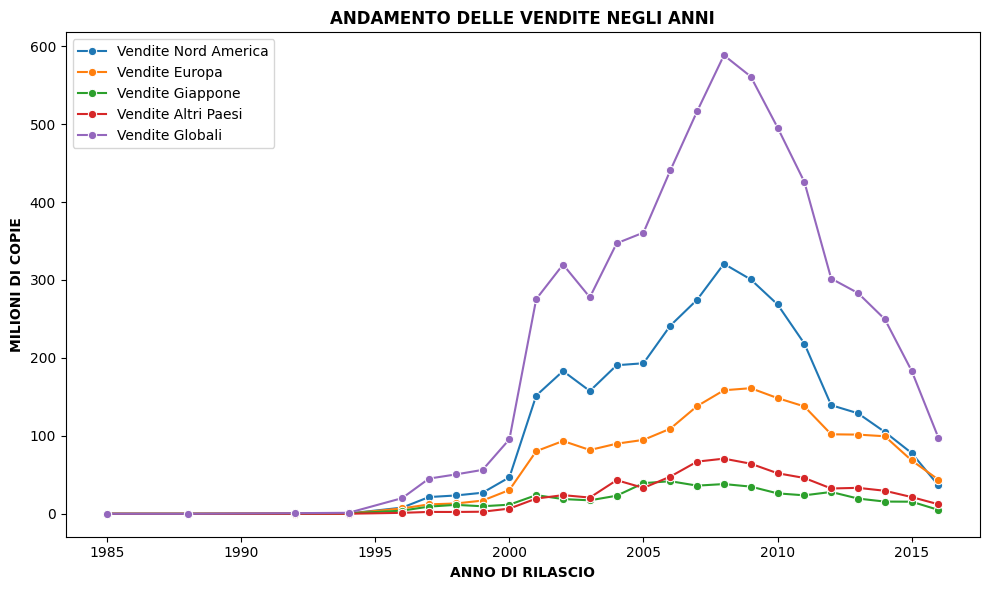

In [29]:
vendite_per_anno = df_unified_name.groupby('Year_of_Release')[[ 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']].sum().reset_index()

plt.figure(figsize=(10,6))

sns.lineplot(data=vendite_per_anno, x='Year_of_Release', y='NA_Sales', marker='o', label='Vendite Nord America')
sns.lineplot(data=vendite_per_anno, x='Year_of_Release', y='EU_Sales', marker='o', label='Vendite Europa')
sns.lineplot(data=vendite_per_anno, x='Year_of_Release', y='JP_Sales', marker='o', label='Vendite Giappone')
sns.lineplot(data=vendite_per_anno, x='Year_of_Release', y='Other_Sales', marker='o', label='Vendite Altri Paesi')
sns.lineplot(data=vendite_per_anno, x='Year_of_Release', y='Global_Sales', marker='o', label='Vendite Globali')

plt.title("ANDAMENTO DELLE VENDITE NEGLI ANNI", fontweight='bold')
plt.ylabel("MILIONI DI COPIE", fontweight='bold')
plt.xlabel("ANNO DI RILASCIO", fontweight='bold')
plt.legend()
plt.tight_layout()

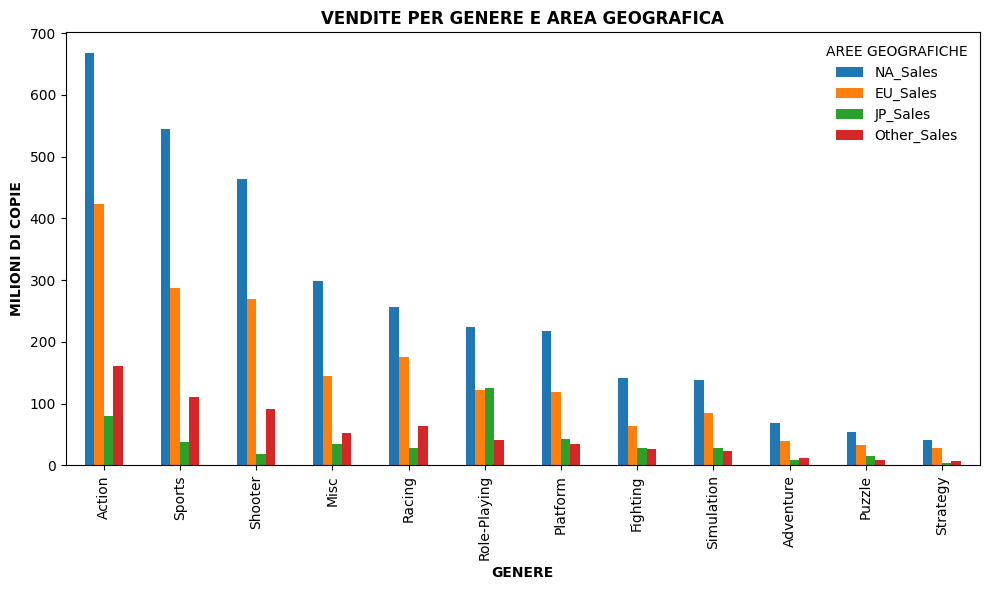

In [30]:
vedite_x_genere = df_unified_name.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
vedite_x_genere = vedite_x_genere.sort_values('NA_Sales', ascending=False)

vedite_x_genere.plot(kind='bar', figsize=(10,6))

plt.title("VENDITE PER GENERE E AREA GEOGRAFICA", fontweight='bold')
plt.ylabel("MILIONI DI COPIE", fontweight='bold')
plt.xlabel("GENERE", fontweight='bold')
plt.legend(title="AREE GEOGRAFICHE", frameon=False)
plt.tight_layout()

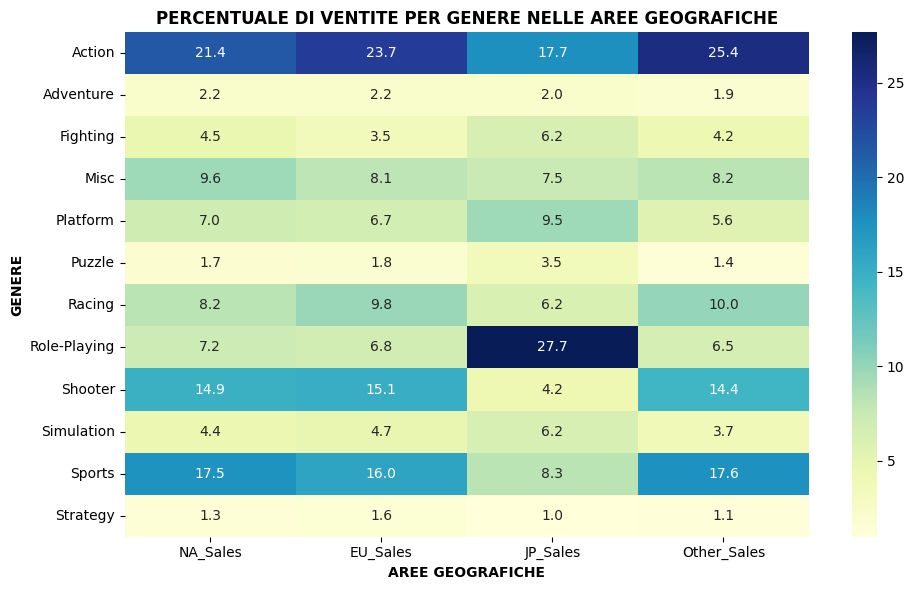

In [31]:
vendite_genere_continente = df_unified_name.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
totali_continente = vendite_genere_continente.sum()
vendite_percentuali = vendite_genere_continente.div(totali_continente, axis=1) * 100
plt.figure(figsize=(10, 6))

sns.heatmap(vendite_percentuali, annot=True, fmt=".1f", cmap="YlGnBu")

plt.title("PERCENTUALE DI VENTITE PER GENERE NELLE AREE GEOGRAFICHE", fontweight='bold')
plt.xlabel("AREE GEOGRAFICHE", fontweight='bold')
plt.ylabel("GENERE",fontweight='bold')
plt.tight_layout()

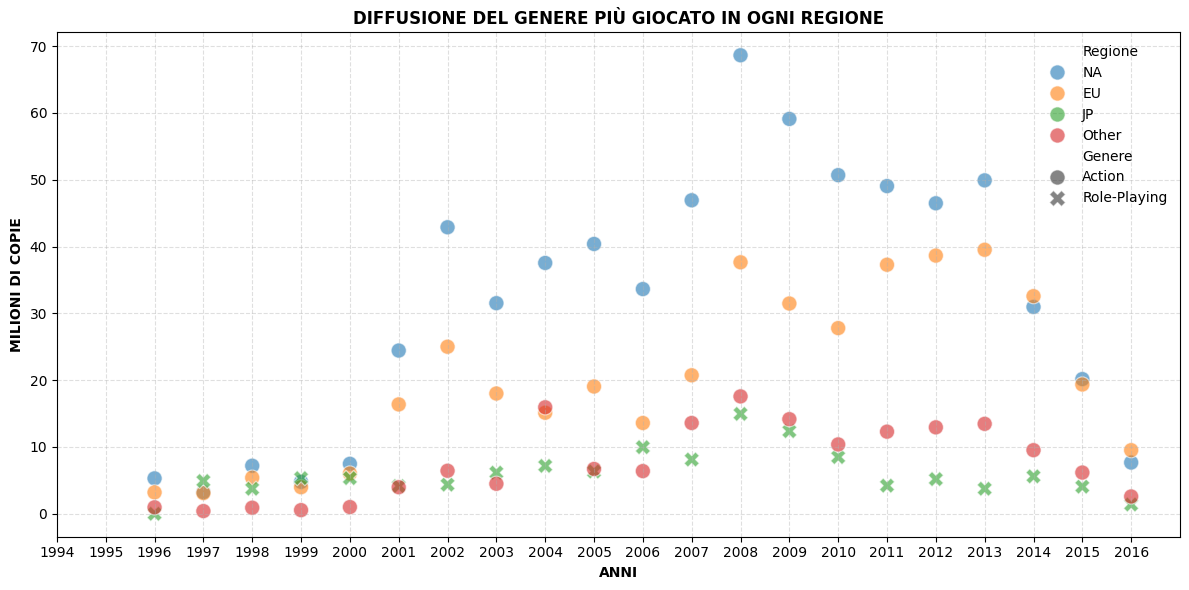

In [32]:
top_generi = df_unified_name.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().idxmax()

na_data = df_unified_name[df_unified_name['Genre'] == top_generi['NA_Sales']].groupby('Year_of_Release')['NA_Sales'].sum().reset_index()
eu_data = df_unified_name[df_unified_name['Genre'] == top_generi['EU_Sales']].groupby('Year_of_Release')['EU_Sales'].sum().reset_index()
jp_data = df_unified_name[df_unified_name['Genre'] == top_generi['JP_Sales']].groupby('Year_of_Release')['JP_Sales'].sum().reset_index()
other_data = df_unified_name[df_unified_name['Genre'] == top_generi['Other_Sales']].groupby('Year_of_Release')['Other_Sales'].sum().reset_index()

na_data['Regione'] = 'NA'
na_data['Genere'] = top_generi['NA_Sales']
na_data['Vendite'] = na_data['NA_Sales']
eu_data['Regione'] = 'EU'
eu_data['Genere'] = top_generi['EU_Sales']
eu_data['Vendite'] = eu_data['EU_Sales']
jp_data['Regione'] = 'JP'
jp_data['Genere'] = top_generi['JP_Sales']
jp_data['Vendite'] = jp_data['JP_Sales']
other_data['Regione'] = 'Other'
other_data['Genere'] = top_generi['Other_Sales']
other_data['Vendite'] = other_data['Other_Sales']

df_filtrato = pd.concat([na_data, eu_data, jp_data, other_data], ignore_index=True)

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_filtrato,
    x='Year_of_Release',
    y='Vendite',
    hue='Regione',
    style='Genere',
    s=120,
    alpha=0.6
)

plt.title('DIFFUSIONE DEL GENERE PIÙ GIOCATO IN OGNI REGIONE', fontweight='bold')
plt.xticks(range(1994, 2017))
plt.xlabel('ANNI', fontweight='bold')
plt.ylabel('MILIONI DI COPIE', fontweight='bold')
plt.grid(True, alpha=0.4, linestyle='--', linewidth=0.8)
plt.legend(loc='upper right', frameon=False)
plt.tight_layout()

<div style="font-family: Arial, sans-serif;">
    <h1 style="text-align: center; color: rgba(0,150,255,1); font-size: 36px;font-weight:bold;">
        Correlazioni tra vendite globali e regionali
    </h1>
    <p style="font-size: 18px;">
        I prossimi grafici esplorano le relazioni lineari tra vendite utilizzando il coefficiente di correlazione di Pearson
    </p>
    <h3 style="font-weight: bold;font-size: 22px;color: rgba(0,150,255,1); border-bottom: 2px solid rgba(0,150,255,0.2);">
        Il Coefficiente di Pearson (r)
    </h3>
    <p  style="font-size: 18px;">
        Misura la forza e la direzione della relazione lineare tra due variabili continue:
    </p>
    <ul  style="font-size: 18px;">
        <li>r = +1: Correlazione perfetta positiva</li>
        <li>r = 0: Nessuna correlazione lineare</li>
        <li>r = -1: Correlazione perfetta negativa</li>
    </ul>
    <h3 style="font-weight: bold;font-size: 22px;color: rgba(0,150,255,1); border-bottom: 2px solid rgba(0,150,255,0.2);">
        Grafici
    </h3>
    <ol  style="font-size: 18px;">
        <li>
            Matrice di Correlazione Multi-Regionale
        </li>
        <li>
            Correlazione Vendite Globali vs Nord America
        </li>
    </ol>
</div>

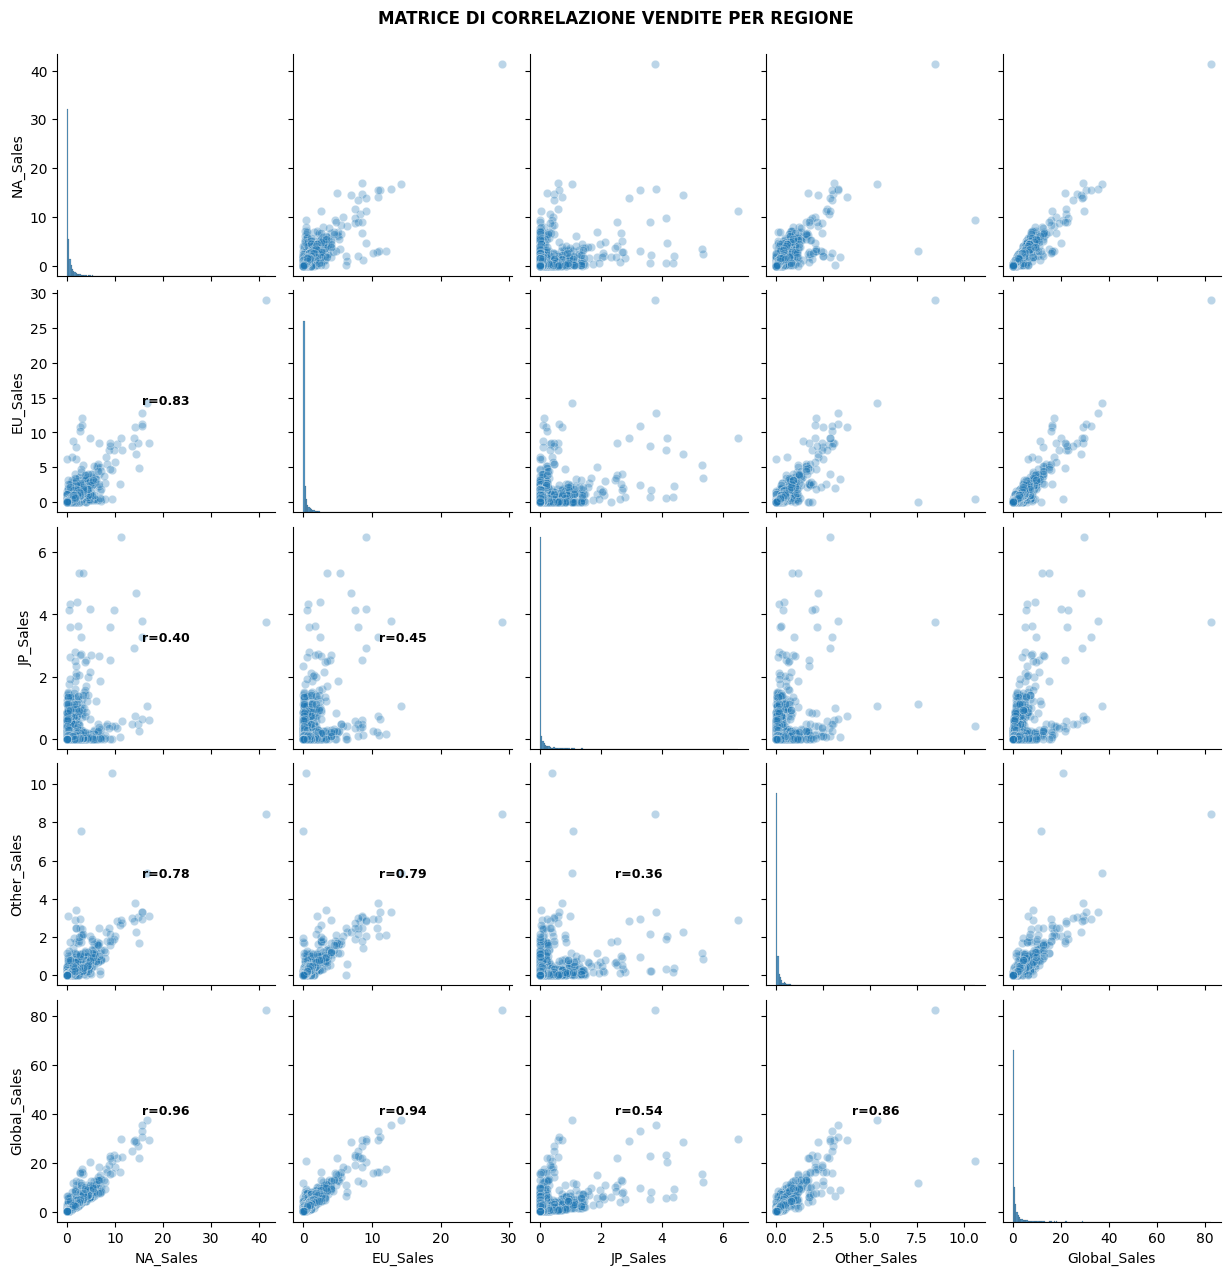

In [33]:
numerical_vars = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

def correlazione(x, y, **kws):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f"r={r:.2f}",
                xy=(0.5, 0.5), xycoords=ax.transAxes,
                ha='center', va='center',
                fontsize=9, fontweight="bold")

g = sns.pairplot(df_unified_name[numerical_vars],
                 diag_kind='hist',
                 plot_kws={'alpha': 0.3})

g.map_lower(correlazione)

_ = g.fig.suptitle('MATRICE DI CORRELAZIONE VENDITE PER REGIONE', fontweight='bold', y=1.02) 

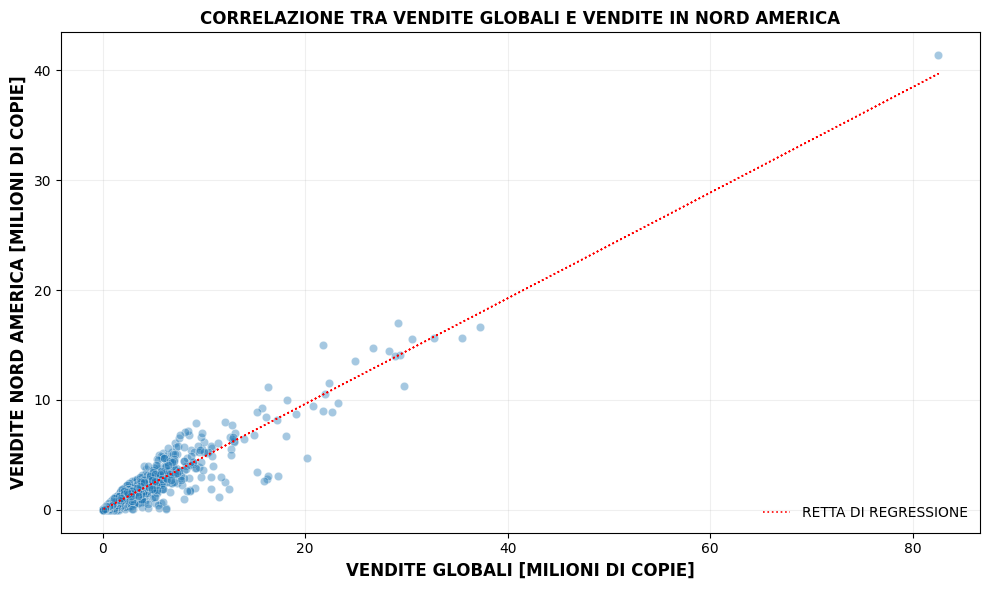

In [34]:
X = df_unified_name['Global_Sales']
y = df_unified_name['NA_Sales']

slope, intercept, _, _, _ = linregress(X, y)
y_pred = slope * X + intercept

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X, y=y, alpha=0.4)
plt.plot(X, y_pred, 'r:', linewidth=1.2, label='RETTA DI REGRESSIONE')

plt.title('CORRELAZIONE TRA VENDITE GLOBALI E VENDITE IN NORD AMERICA', fontweight='bold')
plt.xlabel('VENDITE GLOBALI [MILIONI DI COPIE]', fontweight='bold', fontsize=12)
plt.ylabel('VENDITE NORD AMERICA [MILIONI DI COPIE]', fontweight='bold', fontsize=12)
plt.legend(loc='lower right', frameon=False)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

<div style="font-family: Arial, sans-serif;">
    <h1 style="text-align: center; color: rgba(0,150,255,1); font-size:36px; font-weight:bold;">
        Conclusioni
    </h1>
    <p style="text-align: center;font-size: 18px; color: rgba(102,102,102,1); margin-bottom: 40px;">
        Sintesi dei risultati dall'analisi delle vendite di videogiochi
    </p>
    <h3 style="font-weight: bold;font-size: 22px; color: rgba(0,150,255,1); border-bottom: 2px solid rgba(0,150,255,0.2);">
        Andamento vendite globali
    </h3>
    <ul style="font-size:18px; line-height: 1.6; margin-bottom: 30px;">
        <li>Crescita costante dal 1995 al 2008-2009</li>
        <li>Picco massimo intorno al 2008-2009</li>
        <li>Declino post-2009 per la maggior parte dei generi</li>
    </ul>
    <h3 style="font-weight: bold;font-size: 22px; color: rgba(0,150,255,1); border-bottom: 2px solid rgba(0,150,255,0.2);">
        Preferenze geografiche
    </h3>
    <p style="font-size: 18px;"><strong>Nord America & Europa:</strong> Action, Sports, Shooter</p>
    <p  style="font-size: 18px;"><strong>Giappone:</strong> Role-Playing dominante</p>
    <h3 style="font-weight: bold;font-size: 22px; color: rgba(0,150,255,1); border-bottom: 2px solid rgba(0,150,255,0.2);">
        Correlazione tra mercati
    </h3>
    <p style="font-size: 18px;">Il Nord America mostra correlazione fortissima con le vendite globali <strong>(r = 0.96)</strong></p>
    <p style="font-size: 18px;">Il mercato nordamericano è predittivo del successo globale</p>
</div>